In [1]:
# Import the libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/CNN_assignment.zip

In [5]:
# Defining the path for train and test images

data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [7]:
# Print number of images in the train and test folder

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [8]:
# Define the batch size and image width and height

batch_size = 32
img_height = 180
img_width = 180

In [9]:
# Create a training dataset using 80% of images in the train folder

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),       # Resize the image
  batch_size=batch_size)                    # Set the batch size

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
# Create a validation dataset using 20% of images in the train folder

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),       # Set the image size
  batch_size=batch_size)                    # Set the batch size

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# Print all the class names and the number of classes in the train dataset

class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [12]:
# Print all the class names in the validation dataset

val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

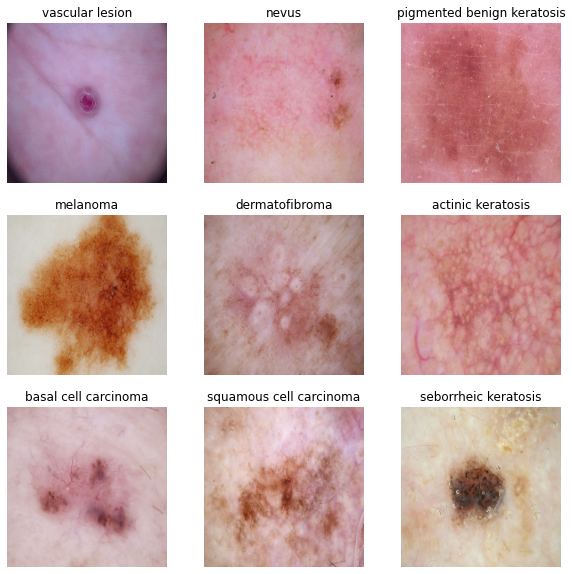

In [13]:
# Visualize one instance of all the nine classes present in the dataset

plt.figure(figsize=(10,10))
plotted_classes = set()
for images, labels in train_ds:
    for i in range(len(labels)):
        if labels[i].numpy() in plotted_classes:
            continue
        plotted_classes.add(labels[i].numpy())
        plt.subplot(3,3,len(plotted_classes))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
        if len(plotted_classes) == 9:
            break
    if len(plotted_classes) == 9:
        break
plt.show()


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model

In [15]:
from tensorflow.keras import layers
num_classes = 9
model = tf.keras.Sequential()

# Normalize the input in the range of (0,1)
model.add(layers.Rescaling(scale=1./255))

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 128 filters of size 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Add a fully connected layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Add a fully connected layer with 9 units
model.add(layers.Dense(9))



## Compile the model

In [16]:
# Compile the model using appropriate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all the layers
model.summary()

## Train the model

In [17]:
# Train the model

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 22s 89ms/step - loss: 2.1244 - accuracy: 0.2411 - val_loss: 1.8353 - val_accuracy: 0.3333
Epoch 2/20
56/56 [==============================] - 2s 39ms/step - loss: 1.7355 - accuracy: 0.3767 - val_loss: 1.5997 - val_accuracy: 0.4586
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 1.5342 - accuracy: 0.4632 - val_loss: 1.4515 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4882 - accuracy: 0.4855 - val_loss: 1.4943 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3834 - accuracy: 0.5201 - val_loss: 1.4669 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.3268 - accuracy: 0.5285 - val_loss: 1.4004 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 2s 42ms/step - loss: 1.2313 - accuracy: 0.5513 - val_loss: 1.5026 - val_accuracy: 0.4720
Epoch 8/20
5

## Visualizing training results

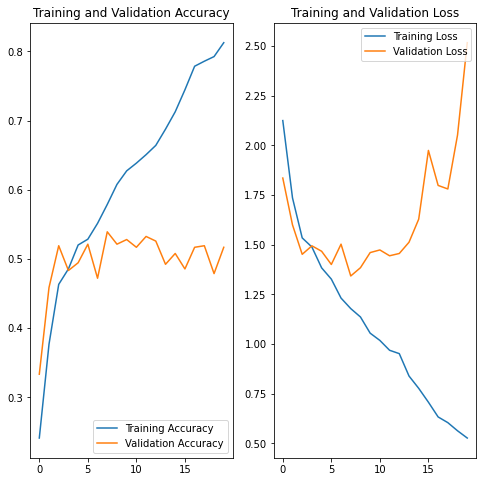

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that the model is overfitting on the training data. At 20 epochs, we're getting an accuracy of approximately 80% on the training data and about 50% on the validation data.

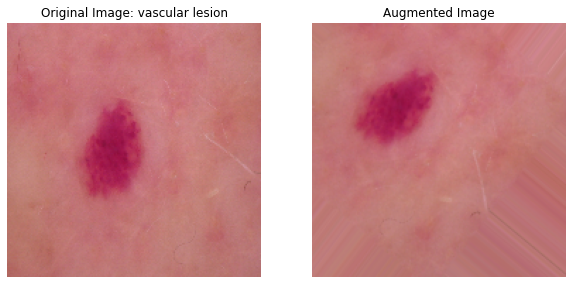

In [20]:
# Let's augment an image in the train dataset and visualize it.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Take one image from the training data
for images, labels in train_ds.take(1):
    image = images[0]
    label = labels[0]

# Use the flow method to apply data augmentation to the image
augmented_images = datagen.flow(image[tf.newaxis, ...], batch_size=1)

# Plot the original and augmented images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image.numpy().astype("uint8"))
plt.title("Original Image: " + class_names[label])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(next(augmented_images)[0].astype("uint8"))
plt.title("Augmented Image")
plt.axis("off")

plt.show()


In [22]:
# Create a new train dataset using the augmented images

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define a function that applies data augmentation to an image
def augment_images(image, label):
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.random_brightness(image, max_delta=0.5)
  image = tf.image.random_contrast(image, lower=0.5, upper=1.5)

  # Return the augmented image and label
  return image, label

# Use the map method to apply data augmentation to the images in the dataset
train_ds_augmented = train_ds.map(augment_images)

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the augmented dataset
history2 = model.fit(
    train_ds_augmented,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 5s 89ms/step - loss: 1.4787 - accuracy: 0.5195 - val_loss: 1.4511 - val_accuracy: 0.5302
Epoch 2/20
56/56 [==============================] - 4s 68ms/step - loss: 1.2217 - accuracy: 0.5737 - val_loss: 1.3187 - val_accuracy: 0.5302
Epoch 3/20
56/56 [==============================] - 4s 78ms/step - loss: 1.1675 - accuracy: 0.5848 - val_loss: 1.3192 - val_accuracy: 0.5503
Epoch 4/20
56/56 [==============================] - 4s 74ms/step - loss: 1.2250 - accuracy: 0.5580 - val_loss: 1.3211 - val_accuracy: 0.5749
Epoch 5/20
56/56 [==============================] - 4s 66ms/step - loss: 1.2081 - accuracy: 0.5798 - val_loss: 1.3502 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 5s 94ms/step - loss: 1.1077 - accuracy: 0.5960 - val_loss: 1.2502 - val_accuracy: 0.5615
Epoch 7/20
56/56 [==============================] - 4s 67ms/step - loss: 1.1573 - accuracy: 0.5938 - val_loss: 1.2939 - val_accuracy: 0.5593
Epoch 8/20
56

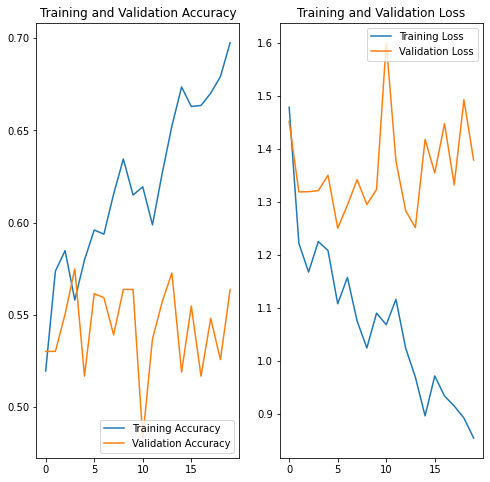

In [23]:
# Check the accuracy of the train and validation datasets

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that the model is overfitting to the training data but it is not as severe as before. Validation accuracy is still very low to make any reasonable predictions.

In [24]:
# Create a model with a dropout layer

from tensorflow.keras import layers
num_classes = 9
model = tf.keras.Sequential()

# Normalize the input in the range of (0,1)
model.add(layers.Rescaling(scale=1./255))

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 128 filters of size 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a dropout layer with a dropout rate of 0.5
model.add(layers.Dropout(0.2))

# Flatten the feature maps
model.add(layers.Flatten())

# Add a fully connected layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Add a fully connected layer with 9 units
model.add(layers.Dense(9))

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the augmented dataset with dropout layer
history3 = model.fit(
    train_ds_augmented,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 5s 76ms/step - loss: 2.0779 - accuracy: 0.2249 - val_loss: 1.9298 - val_accuracy: 0.3020
Epoch 2/20
56/56 [==============================] - 4s 67ms/step - loss: 1.8683 - accuracy: 0.3147 - val_loss: 1.7656 - val_accuracy: 0.3602
Epoch 3/20
56/56 [==============================] - 4s 67ms/step - loss: 1.6514 - accuracy: 0.4157 - val_loss: 1.7056 - val_accuracy: 0.3803
Epoch 4/20
56/56 [==============================] - 4s 67ms/step - loss: 1.5802 - accuracy: 0.4537 - val_loss: 1.5873 - val_accuracy: 0.4653
Epoch 5/20
56/56 [==============================] - 4s 67ms/step - loss: 1.5255 - accuracy: 0.4570 - val_loss: 1.4316 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 4s 67ms/step - loss: 1.4667 - accuracy: 0.4821 - val_loss: 1.4337 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 4s 67ms/step - loss: 1.3706 - accuracy: 0.5106 - val_loss: 1.4417 - val_accuracy: 0.4989
Epoch 8/20
56

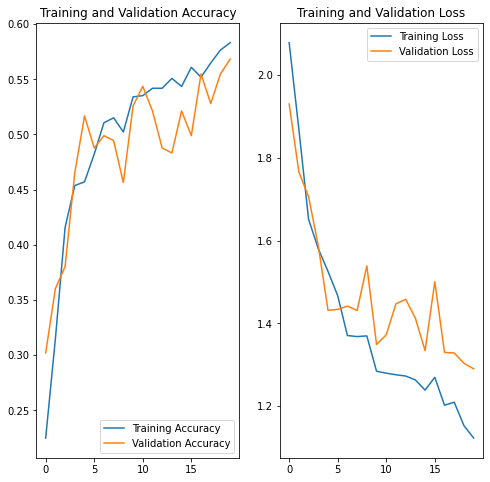

In [25]:
# Check the accuracy on the train and validation data

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that the model is generalising properly but the accuracy on both train and validation data is below 60%.

## Check for class imbalance

In [27]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*','*.jpg'))]
len(path_list)

2239

In [28]:
df_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(df_dict_original.items()),
                           columns = ['Path', 'Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
1,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
2,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
3,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
4,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2235,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2236,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2237,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis


Class=7, n=181 (8.084%)
Class=4, n=357 (15.945%)
Class=1, n=376 (16.793%)
Class=3, n=438 (19.562%)
Class=8, n=139 (6.208%)
Class=0, n=114 (5.092%)
Class=2, n=95 (4.243%)
Class=6, n=77 (3.439%)
Class=5, n=462 (20.634%)


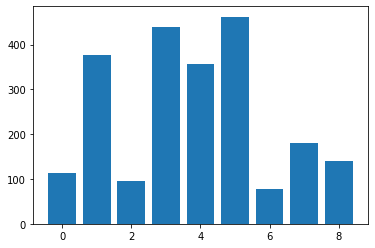

In [121]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Split into input and output elements
X, y = original_df['Path'], original_df['Label']

# Label encode the target variable
y = LabelEncoder().fit_transform(y)

# Summarize distribution
counter = Counter(y)
for k,v in counter.items():
  per = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# Plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [122]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

'seborrheic keratosis' class has the least number of samples.

The following classes dominate the data in terms of proportionate number of samples:
'basal cell carcinoma',
'melanoma',
'nevus',
'pigmented benign keratosis'

## Rectify the class imbalances present in the training dataset using the Augmentor library

In [ ]:
!pip install Augmentor

In [ ]:
path_to_training_dataset= "Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [37]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [129]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

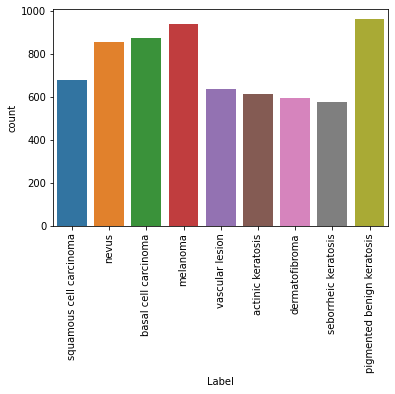

In [133]:
# Visualize the classes after class imbalance handling

sns.countplot(new_df.Label)
plt.xticks(rotation=90)

In [42]:
# Create a new train dataset using the images created by the Augmentor library

data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [43]:
# Create a new validation dataset using 20% of images in the train dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [44]:
# Create the model

from tensorflow.keras import layers
num_classes = 9
model = tf.keras.Sequential()

# Normalize the input in the range of (0,1)
model.add(layers.Rescaling(scale=1./255))

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 128 filters of size 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a dropout layer with a dropout rate of 0.5
model.add(layers.Dropout(0.2))

# Flatten the feature maps
model.add(layers.Flatten())

# Add a fully connected layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Add a fully connected layer with 9 units
model.add(layers.Dense(9))

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the augmented dataset with dropout layer
history4 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/20
169/169 [==============================] - 28s 153ms/step - loss: 1.8251 - accuracy: 0.3132 - val_loss: 1.4960 - val_accuracy: 0.4128
Epoch 2/20
169/169 [==============================] - 26s 148ms/step - loss: 1.4349 - accuracy: 0.4653 - val_loss: 1.4442 - val_accuracy: 0.4707
Epoch 3/20
169/169 [==============================] - 24s 139ms/step - loss: 1.3132 - accuracy: 0.5150 - val_loss: 1.2800 - val_accuracy: 0.5360
Epoch 4/20
169/169 [==============================] - 25s 142ms/step - loss: 1.0698 - accuracy: 0.6115 - val_loss: 1.0663 - val_accuracy: 0.6147
Epoch 5/20
169/169 [==============================] - 25s 143ms/step - loss: 0.9082 - accuracy: 0.6725 - val_loss: 1.0725 - val_accuracy: 0.6229
Epoch 6/20
169/169 [==============================] - 24s 140ms/step - loss: 0.7719 - accuracy: 0.7263 - val_loss: 0.9556 - val_accuracy: 0.6615
Epoch 7/20
169/169 [==============================] - 24s 138ms/step - loss: 0.6803 - accuracy: 0.7574 - val_loss: 1.1268 - val_ac

In [45]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)      

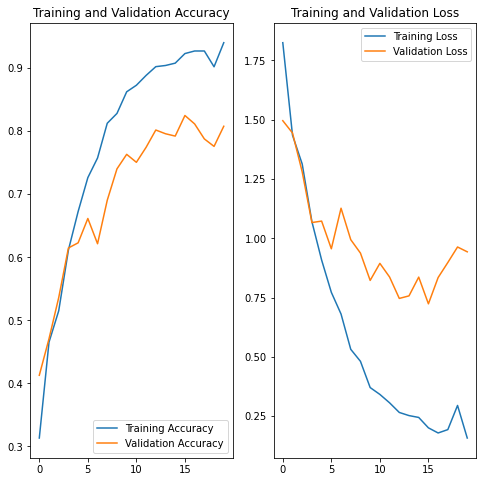

In [46]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that after class imbalance handling using Augmentor library. Our validation accuracy has drastically improved. The model is still slightly overfitting on the training data.

In [47]:
# Use the map method to apply data augmentation to the images in the dataset
train_ds_augmented = train_ds.map(augment_images)

from tensorflow.keras import layers
num_classes = 9
model = tf.keras.Sequential()

# Normalize the input in the range of (0,1)
model.add(layers.Rescaling(scale=1./255))

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 128 filters of size 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a dropout layer with a dropout rate of 0.5
model.add(layers.Dropout(0.2))

# Flatten the feature maps
model.add(layers.Flatten())

# Add a fully connected layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Add a fully connected layer with 9 units
model.add(layers.Dense(9))

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the augmented dataset
history5 = model.fit(
    train_ds_augmented,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 28s 158ms/step - loss: 1.9065 - accuracy: 0.2693 - val_loss: 1.6630 - val_accuracy: 0.3356
Epoch 2/20
169/169 [==============================] - 27s 157ms/step - loss: 1.5645 - accuracy: 0.4071 - val_loss: 1.5145 - val_accuracy: 0.4157
Epoch 3/20
169/169 [==============================] - 27s 157ms/step - loss: 1.4882 - accuracy: 0.4381 - val_loss: 1.4738 - val_accuracy: 0.4551
Epoch 4/20
169/169 [==============================] - 27s 156ms/step - loss: 1.4427 - accuracy: 0.4596 - val_loss: 1.3523 - val_accuracy: 0.4848
Epoch 5/20
169/169 [==============================] - 27s 156ms/step - loss: 1.3845 - accuracy: 0.4701 - val_loss: 1.3395 - val_accuracy: 0.4907
Epoch 6/20
169/169 [==============================] - 27s 157ms/step - loss: 1.2898 - accuracy: 0.5030 - val_loss: 1.1935 - val_accuracy: 0.5561
Epoch 7/20
169/169 [==============================] - 27s 157ms/step - loss: 1.2431 - accuracy: 0.5263 - val_loss: 1.1860 - val_ac

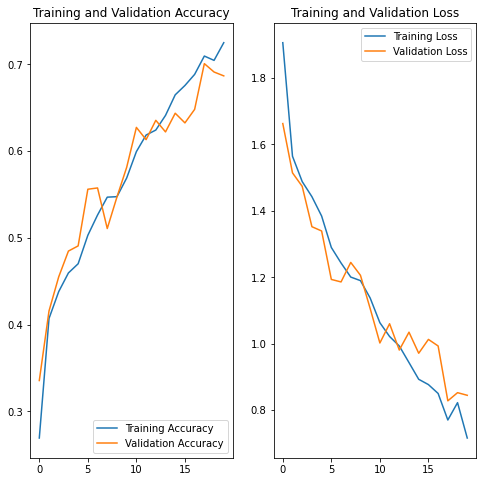

In [152]:
# Check the accuracy on the train and validation data

acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']

loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that the data augmentation has reduced the overfitting on the training data but it has reduced the accuracy on both train and validation data.

In [49]:
# Change the parameters of the ImageDataGenerator object to increase the accuracy of the train and validation data

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define a function that applies data augmentation to an image
def augment_images(image, label):
  # Apply data augmentation
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)

  # Return the augmented image and label
  return image, label

# Use the map method to apply data augmentation to the images in the dataset
train_ds_augmented = train_ds.map(augment_images)

from tensorflow.keras import layers
num_classes = 9
model = tf.keras.Sequential()

# Normalize the input in the range of (0,1)
model.add(layers.Rescaling(scale=1./255))

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 128 filters of size 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a dropout layer with a dropout rate of 0.5
model.add(layers.Dropout(0.2))

# Flatten the feature maps
model.add(layers.Flatten())

# Add a fully connected layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Add a fully connected layer with 9 units
model.add(layers.Dense(9))

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the augmented dataset
history6 = model.fit(
    train_ds_augmented,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 37s 209ms/step - loss: 1.9154 - accuracy: 0.2804 - val_loss: 1.6460 - val_accuracy: 0.4016
Epoch 2/20
169/169 [==============================] - 26s 152ms/step - loss: 1.5274 - accuracy: 0.4141 - val_loss: 1.5200 - val_accuracy: 0.4232
Epoch 3/20
169/169 [==============================] - 26s 151ms/step - loss: 1.4107 - accuracy: 0.4642 - val_loss: 1.3861 - val_accuracy: 0.4603
Epoch 4/20
169/169 [==============================] - 27s 155ms/step - loss: 1.3441 - accuracy: 0.4937 - val_loss: 1.4614 - val_accuracy: 0.4796
Epoch 5/20
169/169 [==============================] - 29s 166ms/step - loss: 1.2882 - accuracy: 0.5165 - val_loss: 1.3707 - val_accuracy: 0.4788
Epoch 6/20
169/169 [==============================] - 28s 159ms/step - loss: 1.2327 - accuracy: 0.5291 - val_loss: 1.2718 - val_accuracy: 0.5330
Epoch 7/20
169/169 [==============================] - 27s 153ms/step - loss: 1.1495 - accuracy: 0.5679 - val_loss: 1.3013 - val_ac

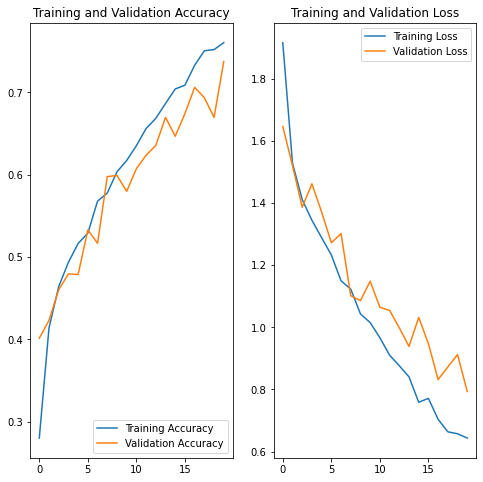

In [151]:
# Check the accuracy of the train and validation data

acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that the accuracy has slightly increased over the previous model

In [134]:
from tensorflow.keras import layers
num_classes = 9
model = tf.keras.Sequential()

# Normalize the input in the range of (0,1)
model.add(layers.Rescaling(scale=1./255))

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 128 filters of size 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 256 filters of size 3x3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a dropout layer with a dropout rate of 0.2
model.add(layers.Dropout(0.2))

# Flatten the feature maps
model.add(layers.Flatten())

# Add a fully connected layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Add a dropout layer with a dropout rate of 0.2
model.add(layers.Dropout(0.2))

# Add a fully connected layer with 9 units
model.add(layers.Dense(9))

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the augmented dataset
history7 = model.fit(
    train_ds_augmented,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 28s 152ms/step - loss: 1.9160 - accuracy: 0.2730 - val_loss: 1.7061 - val_accuracy: 0.3512
Epoch 2/20
169/169 [==============================] - 31s 180ms/step - loss: 1.5986 - accuracy: 0.3859 - val_loss: 1.5468 - val_accuracy: 0.3794
Epoch 3/20
169/169 [==============================] - 32s 187ms/step - loss: 1.5091 - accuracy: 0.4145 - val_loss: 1.4385 - val_accuracy: 0.4358
Epoch 4/20
169/169 [==============================] - 26s 151ms/step - loss: 1.5362 - accuracy: 0.4088 - val_loss: 1.3889 - val_accuracy: 0.4610
Epoch 5/20
169/169 [==============================] - 27s 155ms/step - loss: 1.4475 - accuracy: 0.4392 - val_loss: 1.3998 - val_accuracy: 0.4692
Epoch 6/20
169/169 [==============================] - 26s 151ms/step - loss: 1.3848 - accuracy: 0.4590 - val_loss: 1.2938 - val_accuracy: 0.4981
Epoch 7/20
169/169 [==============================] - 27s 155ms/step - loss: 1.3379 - accuracy: 0.4802 - val_loss: 1.2855 - val_ac

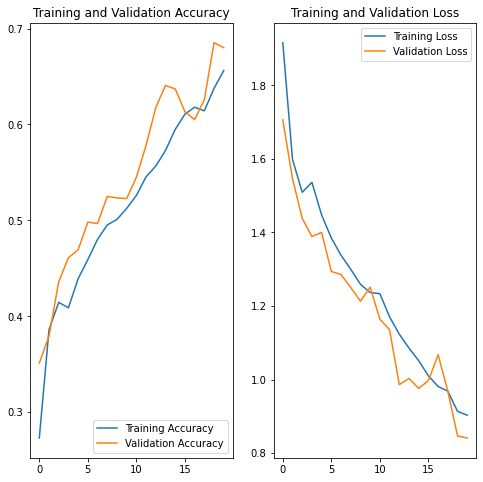

In [150]:
# Check the accuracy of the train and validation data

acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']

loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [143]:
from tensorflow.keras import layers
num_classes = 9
model = tf.keras.Sequential()

# Normalize the input in the range of (0,1)
model.add(layers.Rescaling(scale=1./255))

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 128 filters of size 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a dropout layer with a dropout rate of 0.5
model.add(layers.Dropout(0.2))

# Flatten the feature maps
model.add(layers.Flatten())

# Add a fully connected layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Add a fully connected layer with 9 units
model.add(layers.Dense(9))

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the augmented dataset
history8 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 24s 137ms/step - loss: 1.7830 - accuracy: 0.3212 - val_loss: 1.6122 - val_accuracy: 0.3950
Epoch 2/20
169/169 [==============================] - 24s 137ms/step - loss: 1.3945 - accuracy: 0.4802 - val_loss: 1.4433 - val_accuracy: 0.5071
Epoch 3/20
169/169 [==============================] - 24s 137ms/step - loss: 1.1643 - accuracy: 0.5668 - val_loss: 1.2863 - val_accuracy: 0.5434
Epoch 4/20
169/169 [==============================] - 24s 137ms/step - loss: 0.9943 - accuracy: 0.6384 - val_loss: 1.1535 - val_accuracy: 0.6229
Epoch 5/20
169/169 [==============================] - 24s 136ms/step - loss: 0.8641 - accuracy: 0.6927 - val_loss: 0.9622 - val_accuracy: 0.6578
Epoch 6/20
169/169 [==============================] - 31s 177ms/step - loss: 0.6946 - accuracy: 0.7524 - val_loss: 0.9693 - val_accuracy: 0.6964
Epoch 7/20
169/169 [==============================] - 27s 156ms/step - loss: 0.5921 - accuracy: 0.7871 - val_loss: 0.8782 - val_ac

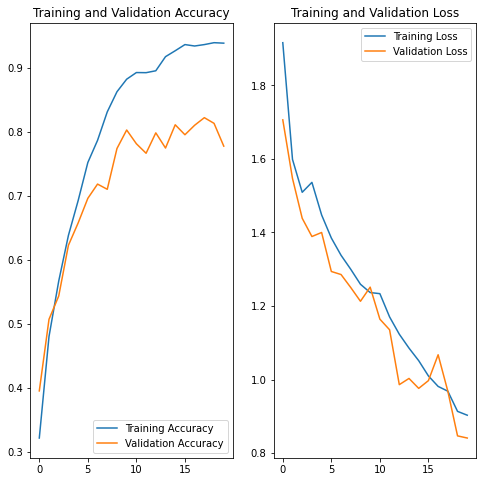

In [144]:
# Check the accuracy of the train and validation data

acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']

loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Create a model with data augmentation and class imbalance handling

In [148]:
from tensorflow.keras import layers
num_classes = 9
model = tf.keras.Sequential()

# Normalize the input in the range of (0,1)
model.add(layers.Rescaling(scale=1./255))

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 128 filters of size 3x3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a convolutional layer with 256 filters of size 3x3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a dropout layer with a dropout rate of 0.2
model.add(layers.Dropout(0.2))

# Flatten the feature maps
model.add(layers.Flatten())

# Add a fully connected layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Add a dropout layer with a dropout rate of 0.2
model.add(layers.Dropout(0.2))

# Add a fully connected layer with 9 units
model.add(layers.Dense(9))

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the augmented dataset
history10 = model.fit(
    train_ds_augmented,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
169/169 [==============================] - 27s 151ms/step - loss: 1.9516 - accuracy: 0.2402 - val_loss: 1.7116 - val_accuracy: 0.3571
Epoch 2/30
169/169 [==============================] - 26s 150ms/step - loss: 1.6245 - accuracy: 0.3670 - val_loss: 1.6945 - val_accuracy: 0.3712
Epoch 3/30
169/169 [==============================] - 27s 158ms/step - loss: 1.5884 - accuracy: 0.3963 - val_loss: 1.4674 - val_accuracy: 0.4343
Epoch 4/30
169/169 [==============================] - 26s 151ms/step - loss: 1.4815 - accuracy: 0.4290 - val_loss: 1.4088 - val_accuracy: 0.4536
Epoch 5/30
169/169 [==============================] - 26s 151ms/step - loss: 1.4379 - accuracy: 0.4410 - val_loss: 1.5403 - val_accuracy: 0.4135
Epoch 6/30
169/169 [==============================] - 26s 151ms/step - loss: 1.3473 - accuracy: 0.4724 - val_loss: 1.4752 - val_accuracy: 0.4373
Epoch 7/30
169/169 [==============================] - 26s 150ms/step - loss: 1.3234 - accuracy: 0.4863 - val_loss: 1.3836 - val_ac

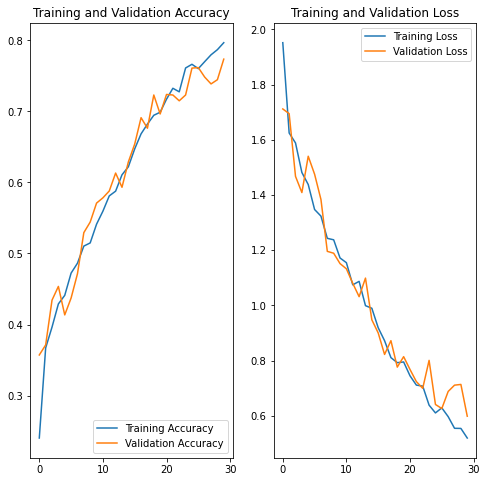

In [149]:
# Check the accuracy of the train and validation data

acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']

loss = history10.history['loss']
val_loss = history10.history['val_loss']

epochs_range = range(min(len(acc), len(val_acc)))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see that model trained on augmented training dataset after handling class imbalance is performing better than all the previous models.